In [1]:
import numpy as np
np.random.seed(seed=369)
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

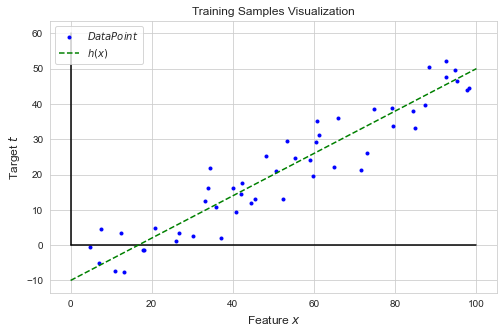

In [2]:
""" synthesis some training data """

def add_white_noise(_input, sigma):
    # add Gaussian white noise to the input (simulate the noisy real world)
    return _input + np.random.randn(_input.shape[0]) * sigma # sigma: variance

def h(x):
    # y = ax + b
    a = 0.6
    b = -10
    return a*x + b

x = np.random.uniform(0, 100, 50) # generate 50 data points (0 <= x <= 100)

# assume the target (y) and the feature (x) have linear correlation (plus some Gaussian noise)
y = add_white_noise(h(x), 5) 

# Visualize 
plt.figure(figsize=(8, 5))
plt.plot(x, y, '.', color='blue', label='$Data Point$')

plt.plot([0, 0], [0, 60], 'black') # y-axis
plt.plot([0, 100], [0, 0], 'black') # x-axis
plt.plot([0, 100], [h(0), h(100)], 'g--', label='$h(x)$') # line of function y = h(x)
plt.xlabel('Feature $x$', fontsize=12)
plt.ylabel('Target $t$', fontsize=12)

plt.title('Training Samples Visualization')
plt.legend(loc=2)
plt.show()

In [3]:
def forward_propagation(_in, _w, _b):
    # output = weight * input + bias
    # linear activation.
    return _w * _in + _b

def loss(y_, y):
    # mean squared loss
    return np.mean((y_ - y)**2)

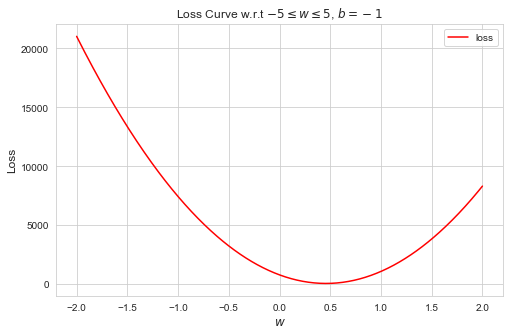

In [4]:
""" 
 Plot the loss vs the different weight w 
 Note that, we only have one weight, so it is easy to plot the loss curve
 If we have multiple weights (>3), it is impossible to visualize them together directly
"""

ws = np.linspace(-2, 2, num=500)  # get 500 potential weight values (assume -2 <= w <= 2)
b = -1 # just assume bias is fixed to -1

loss_ws = np.vectorize(lambda w: loss(forward_propagation(x, w, b), y))(ws)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(ws, loss_ws, 'r-', label='loss')
plt.xlabel('$w$', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Loss Curve w.r.t $-5 \leq w \leq 5$, $b=-1$')
#plt.xlim(0, 4)
plt.legend()
plt.show()

**Gradient Descent:**   $ w^{(t+1)} = w^{(t)} - \mu \Delta w^{(t)} $ ($\mu$ is learning rate)

**Gradient:**   $ \Delta w = \cfrac{\partial L}{\partial w} $

**Our Neural Network $f(x)$:**   $ \hat{y} = f(x) = wx + b $

**Loss of Our Neural Network (on $N$ samples):**   $ L = \cfrac{1}{N}\sum (\hat{y} - y)^2 = \cfrac{1}{N}\sum (wx + b - y)^2 $

**Loss of Our Neural Network (on $i$-th sample):**   $ L = (\hat{y} - y)^2 = (wx + b - y)^2 $

**Gradient (chain-rule):**   $ \cfrac{\partial L}{\partial w} = \cfrac{\partial L}{\partial \hat{y}} \cfrac{\partial \hat{y}}{\partial w} = 2(\hat{y} - y) \cfrac{\partial \hat{y}}{\partial w} = 2(\hat{y} - y) x = 2(wx + b - y)x$


In [31]:
def compute_gradient(_w, _b, x, y):
    """ compute the gradient on each sample w.r.t weight (w) """
    return 2 * (forward_propagation(x, _w, _b) - y) * x

def back_propagation(_w, _b, x, y):
    """ compute gradient (over all samples) for updating the weight (w) """
    return np.mean(compute_gradient(_w, _b, x, y))

def compute_weight(_w, _b, x, y, learning_rate):
    """ optimize the weight (w) """
    return _w - learning_rate * back_propagation(_w, _b, x, y)


epoch  0  loss  55.0588419123485  	 weight [0.40072679]
epoch  1  loss  44.87103424137108  	 weight [0.44024016]
epoch  2  loss  43.92308663315669  	 weight [0.45229317]
epoch  3  loss  43.834882703818764  	 weight [0.45596979]
epoch  4  loss  43.82667556970794  	 weight [0.45709129]
epoch  5  loss  43.82591191835114  	 weight [0.45743338]
epoch  6  loss  43.82584086268337  	 weight [0.45753774]
epoch  7  loss  43.825834251148045  	 weight [0.45756957]
epoch  8  loss  43.82583363596278  	 weight [0.45757928]
epoch  9  loss  43.82583357872148  	 weight [0.45758224]


Text(0, 0.5, 'Loss')

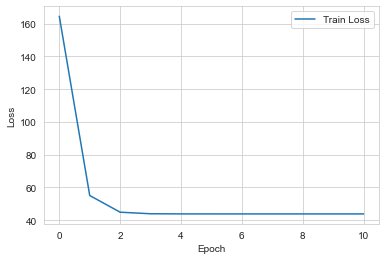

In [61]:
EPOCHS = 10 # total epochs
LR = 1e-4 # learning rate

w = np.random.rand(1) # randomly initialize the weight (0~1.0)
b = -1 # constant bias

""" optimize the weight (w) """
hist = [(w, loss(forward_propagation(x, w, b), y))] # track weight and loss values
for i in range(EPOCHS):
    w = compute_weight(w, b, x, y, LR)
    l = loss(forward_propagation(x, w, b), y)
    print('epoch ', i, ' loss ', l, ' \t weight', w)
    hist.append((w, l))
    
plt.plot([i for i in range(len(hist))], [h[1] for h in hist], label='Train Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')

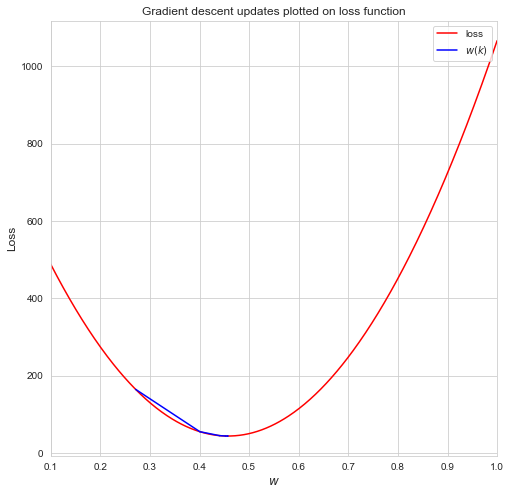

In [64]:
""" Visualize Gradient Descent """
plt.figure(figsize=(8, 8))
ws = np.linspace(0.1, 1, num=500)  # get 500 potential weight values (assume -2 <= w <= 2)
loss_ws = np.vectorize(lambda w: loss(forward_propagation(x, w, b), y))(ws)
plt.plot(ws, loss_ws, 'r-', label='loss')  # Loss curve

# Plot the updates
for i in range(0, len(hist)-1):
    w1, l1 = hist[i]
    w2, l2 = hist[i+1]
    plt.plot(w1, l1, 'b')
    plt.plot([w1, w2],[l1, l2], 'b')
plt.plot(w2, l2, 'b', label='$w(k)$')

# Show figure
plt.xlabel('$w$', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Gradient descent updates plotted on loss function')
plt.xlim(0.1, 1)
plt.legend(loc=1)
plt.show()